In [1]:
# Modern Portolio Theory 
# The aim of this code is to demonstrate the modern portfolio theory 

In [74]:
import numpy as np
import scipy.linalg as la 
import matplotlib.pyplot as plt 
import yfinance as yf 
import scipy.optimize as optimization 
import pandas as pd 

In [75]:
# Choose the stocks 
stocks = ['AAPL', 'WMT','TSLA', 'GE', 'AMZN','DB']

In [84]:
# Historical data: Start_day and End_date 

start_date = '2012-01-01'
end_date = '2017-01-01'



In [103]:
def download_data(stocks:list): 
    stock_dict = { }
    for name in stocks: 
        ticker = yf.Ticker(name)
        stock_dict[name] = ticker.history(start=start_date, end=end_date)['Close']
    return pd.DataFrame(stock_dict)



In [98]:
# Plot data 

def show_data(data): 
#     plt.figure(figsize=(8,4), dpi=300)
#     plt.title('Our Portfolio')
#     for name in stocks: 
#         plt.plot(data[name].index, data[name].values, label=str(name))
#         plt.legend()
#         plt.ylabel('Close Stock Prices')
#         plt.xlabel('Time')
#     plt.show()
    data.plot(figsize=(8,4))
    plt.show()
    

In [104]:
data = download_data(stocks)

In [105]:
[data.keys()]

[Index(['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB'], dtype='object')]

In [106]:
data

,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2012-01-03 00:00:00-05:00,12.482927,46.785130,1.872000,86.152107,8.951500,31.421202
2012-01-04 00:00:00-05:00,12.550013,46.304348,1.847333,87.090622,8.875500,30.474541
2012-01-05 00:00:00-05:00,12.689340,46.079445,1.808000,87.043655,8.880500,28.581224
2012-01-06 00:00:00-05:00,12.821993,45.753727,1.794000,87.512894,9.130500,27.027121
2012-01-09 00:00:00-05:00,12.801657,45.893322,1.816667,88.498283,8.928000,26.538017
...,...,...,...,...,...,...
2016-12-23 00:00:00-05:00,27.182159,61.378521,14.222667,176.975006,38.029499,17.001717
2016-12-27 00:00:00-05:00,27.354792,61.519730,14.635333,177.086044,38.570000,16.764442
2016-12-28 00:00:00-05:00,27.238146,61.175499,14.649333,175.975784,38.606499,16.353773


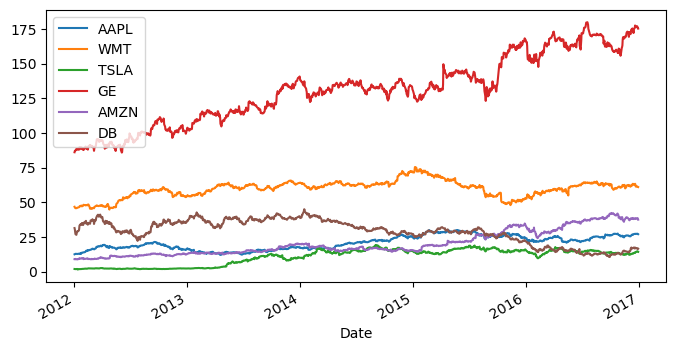

In [107]:
show_data(data)

In [91]:
# Calculate the return 
def calculate_return(data):
    log_return =  np.log(data / data.shift(1))
    return log_return.dropna()

In [111]:
nums_trading_days = 252
def show_statistics(returns):
    print(returns.mean() * nums_trading_days)
    print(returns.cov() * nums_trading_days)
    

In [112]:
returns = calculate_return(data)
show_statistics(returns)

AAPL    0.154803
WMT     0.053214
TSLA    0.406862
GE      0.142554
AMZN    0.287153
DB     -0.128913
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.068351  0.008142  0.025434  0.014196  0.019009  0.024571
WMT   0.008142  0.028017  0.010265  0.009221  0.008545  0.013247
TSLA  0.025434  0.010265  0.252700  0.019334  0.041774  0.039047
GE    0.014196  0.009221  0.019334  0.032647  0.018026  0.031347
AMZN  0.019009  0.008545  0.041774  0.018026  0.094476  0.031574
DB    0.024571  0.013247  0.039047  0.031347  0.031574  0.139114


In [115]:
returns.mean() * [0.5,0.1,0.1,0.1,0.05,0.05]

AAPL    0.000307
WMT     0.000021
TSLA    0.000161
GE      0.000057
AMZN    0.000057
DB     -0.000026
dtype: float64

In [129]:
def show_mean_variance(returns, weights): 
    # we are interested in annual returns 
    weights = np.array(weights)
    portfolio_returns = np.sum(returns.mean() * weights) * nums_trading_days
    portfolio_volatility = np.sqrt(np.array(weights).conj().T@returns.cov()@np.array(weights) *  nums_trading_days )
    print('Portfolio Return', portfolio_returns)
    print('Portfolio Volatility', portfolio_volatility)

In [136]:
# test weights 
weights = [0.5,0.1,0.1,0.1,0.1,0.1]

In [130]:
show_mean_variance(returns, weights)

Portfolio Return 0.15348868995661827
Portfolio Volatility 0.1901057287054351


In [187]:
def generate_portfolios(returns): 
    # Generate 10000 samples of weights 
    nums_portfolios = 10000
    portfolio_means = [ ]
    porfolio_risks = [ ]
    porfolio_weights = [ ]
    
    for _ in range(nums_portfolios): 
        w = np.random.random(len(stocks))
        w /= np.sum(w) # to normalize the array
        mean = np.sum(returns.mean() * w) * nums_trading_days
        risk = np.sqrt(w.T@returns.cov()@w *  nums_trading_days )
        
        portfolio_means.append(mean)
        porfolio_risks.append(risk)
        porfolio_weights.append(w)
        
    return np.array(porfolio_weights), np.array(portfolio_means), np.array(porfolio_risks)


In [194]:
def show_portfolios(returns, volatilities): 
    plt.figure(figsize=(10,5))
    plt.scatter(volatilities,returns, c= returns/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar(label="Sharpe Ratio")
    plt.show()

In [189]:
port_weights , port_returns, port_volatilities = generate_portfolios(returns)

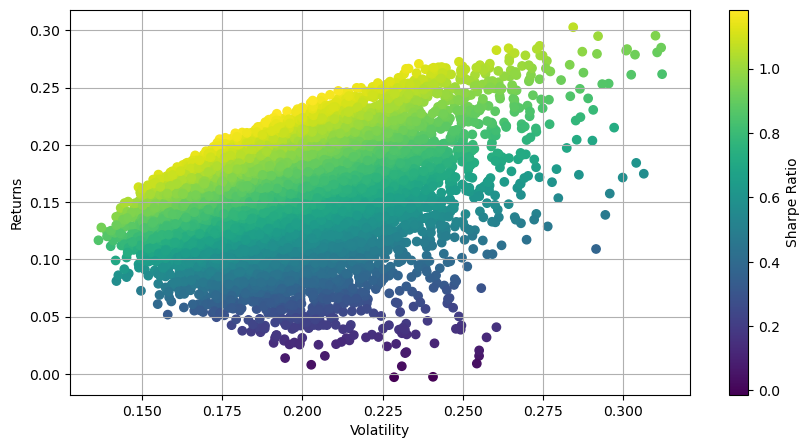

In [190]:
plot_portfolios(port_returns, port_volatilities)

In [198]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(
        np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights))
    )
    return np.array(
        [
            portfolio_return,
            portfolio_volatility,
            portfolio_return / portfolio_volatility,
        ]
    )



def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]


# what are the constraints? The sum of weights = 1 !!!
# f(x)=0 this is the function to minimize
def optimize_portfolio(weights, returns):
    # the sum of weights is 1
    constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}
    # the weights can be 1 at most: 1 when 100% of money is invested into a single stock
    bounds = tuple((0, 1) for _ in range(len(stocks)))
    return optimization.minimize(
        fun=min_function_sharpe,
        x0=weights[0],
        args=returns,
        method="SLSQP",
        bounds=bounds,
        constraints=constraints,
    )


def print_optimal_portfolio(optimum, returns):
    print("Optimal portfolio: ", optimum["x"].round(3))
    print(
        "Expected return, volatility and Sharpe ratio: ",
        statistics(optimum["x"].round(3), returns),
    )


def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize=(10, 6))
    plt.scatter(
        portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker="o"
    )
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Return")
    plt.colorbar(label="Sharpe Ratio")
    plt.plot(
        statistics(opt["x"], rets)[1],
        statistics(opt["x"], rets)[0],
        "g*",
        markersize=20.0,
    )
    plt.show()

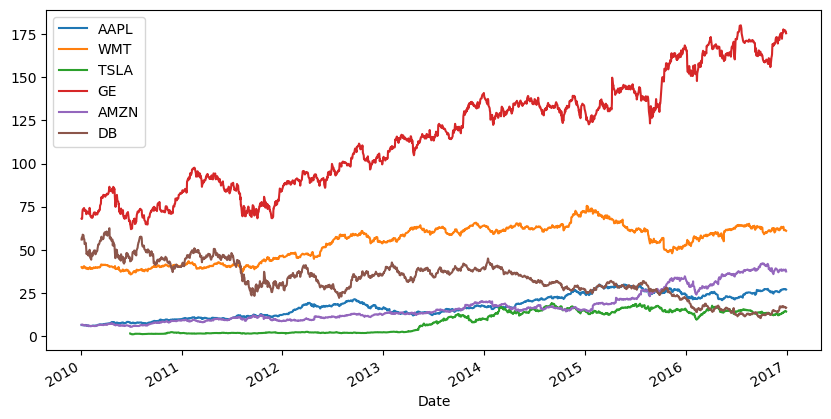

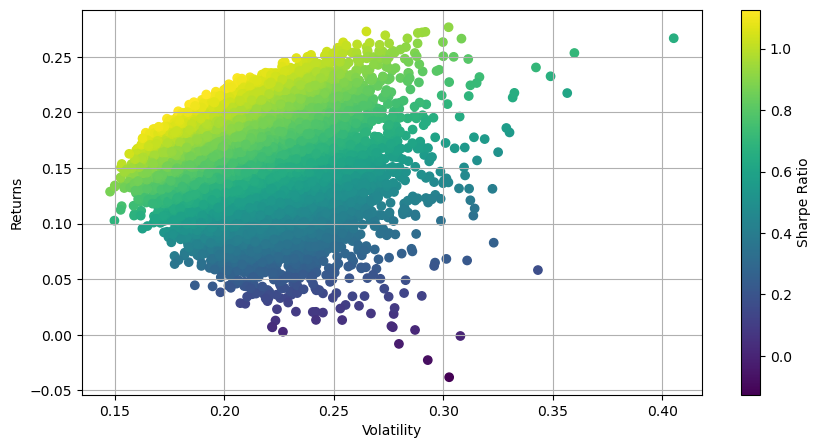

Optimal portfolio:  [0.236 0.148 0.099 0.201 0.316 0.   ]
Expected return, volatility and Sharpe ratio:  [0.21495327 0.1893775  1.13505178]


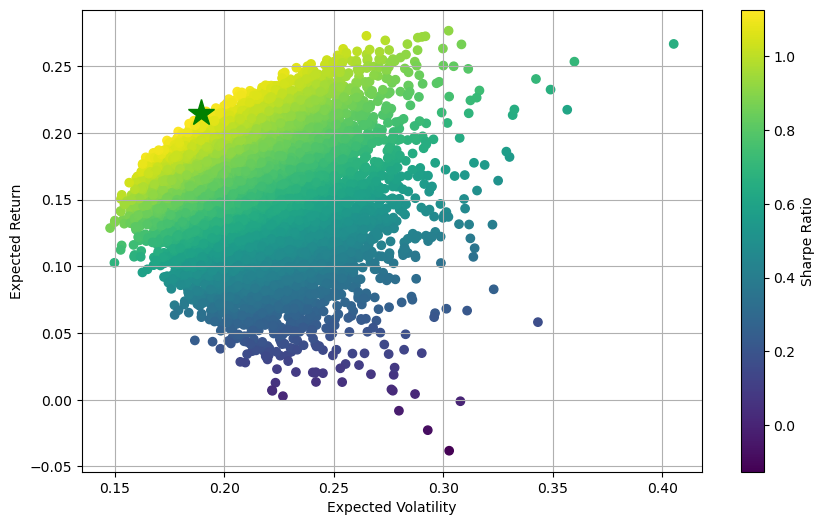

In [200]:
if __name__ == "__main__":
    NUM_TRADING_DAYS = 252
    NUM_PORTFOLIOS = 10000
    dataset = download_data()
    show_data(dataset)
    log_daily_returns = calculate_return(dataset)
    # show_statistics(log_daily_returns)

    pweights, means, risks = generate_portfolios(log_daily_returns)
    show_portfolios(means, risks)
    optimum = optimize_portfolio(pweights, log_daily_returns)
    print_optimal_portfolio(optimum, log_daily_returns)
    show_optimal_portfolio(optimum, log_daily_returns, means, risks)

In [232]:
# Source Code From https://zhuanlan.zhihu.com/p/158994244

import scipy.linalg as linalg
class Markowitz:
    def __init__(self, returns):
        self.returns = returns
    # 求解最小方差组合
    def solveMinVar(self, goal_ret):
        cov = np.array(self.returns.cov())
        mean = np.array(self.returns.mean())
        row1 = np.append(np.append(cov.swapaxes(0,1),[mean],axis=0),
                        [np.ones(len(mean))], axis=0).swapaxes(0,1)
        row2 = list(np.ones(len(mean)))
        row2.extend([0,0])
        row3 = list(mean)
        row3.extend([0,0])
        A = np.append(row1, np.array([row2,row3]), axis=0)
        b = np.append(np.zeros(len(mean)), [1,goal_ret], axis=0)
        results = linalg.solve(A, b)
        return(np.array([list(self.returns.columns), results[:-2]]))
    # 计算投资组合方差
    def calVar(self, portion):
        return(np.dot(np.dot(portion, self.returns.cov()), portion))
    # 绘制有效前沿
    def plotFrontier(self):
        goal_ret = [x/100000 for x in range(-500, 1000)]
        variance = list(map(lambda x: self.calVar(self.solveMinVar(x)[1,:].astype(float)), goal_ret))
        
#         nums_portfolios = 10000
#         nums_trading_days = 256 
#         portfolio_means = [ ]
#         porfolio_risks = [ ]
#         porfolio_weights = [ ]

#         for _ in range(nums_portfolios): 
#             w = np.random.random(len(returns.keys()))
#             w /= np.sum(w) # to normalize the array
#             mean = np.sum(returns.mean() * w) * nums_trading_days
#             risk = np.sqrt(w.T@returns.cov()@w *  nums_trading_days )

#             portfolio_means.append(mean)
#             porfolio_risks.append(risk)
#             porfolio_weights.append(w)
        
#         exp_volatilities = np.array(porfolio_risks)
#         exp_returns = np.array(portfolio_means)
        
#         plt.scatter(exp_volatilities,exp_returns, c= exp_returns/exp_volatilities, marker='o')
#         plt.grid(True)
        
        plt.plot(variance, goal_ret)
        plt.xlabel('Variance')
        plt.ylabel('Expected Return')
        plt.title('Efficient Frontier')

In [233]:
len(returns.keys())

6

In [234]:
test_MPT = Markowitz(returns)

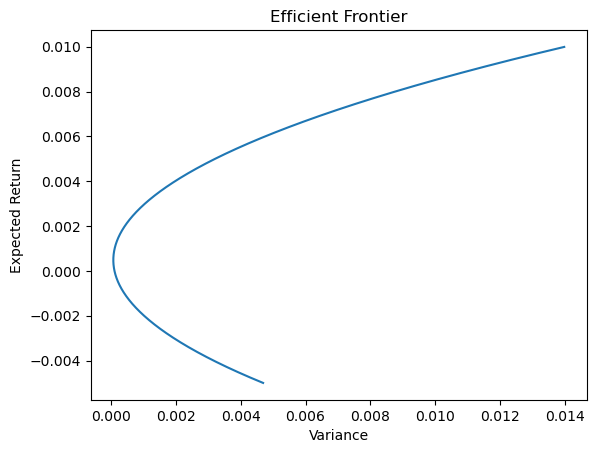

In [235]:
test_MPT.plotFrontier()

In [213]:
test_MPT.solveMinVar(0.002)

array([['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB'],
       ['0.22489201509494697', '-0.20817216427754479',
        '0.2765024993158813', '0.8959712271746908', '0.5183109408716062',
        '-0.7075045181795804']], dtype='<U32')

In [209]:
0.236 0.148 0.099 0.201 0.316 0. 

SyntaxError: invalid syntax (1790944428.py, line 1)